In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('outputs/full_swissroll_experiments/summary.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/full_swissroll_experiments/summary.csv'

In [6]:
df

,name,use_manifold,mixed_noise,tangent_fraction,normal_fraction,num_timesteps,num_epochs,batch_size,lr,num_eval_samples,max_true_eval,max_gen_eval,u_range,v_range,grid_n_u,grid_n_v,seed,device,chamfer,swiss_dist
0,baseline_isotropic,False,False,0.0,1.0,1000,5,128,0.001,2000,2000,2000,"(4.71238898038469, 14.137166941154069)","(0.0, 10.0)",200,50,0,NaN,13.139843,11.712636
1,tangent_ratio_0.00,True,True,0.0,1.0,1000,5,128,0.001,2000,2000,2000,"(4.71238898038469, 14.137166941154069)","(0.0, 10.0)",200,50,0,NaN,46426.214844,46390.164062
2,tangent_ratio_0.50,True,True,0.5,1.0,1000,5,128,0.001,2000,2000,2000,"(4.71238898038469, 14.137166941154069)","(0.0, 10.0)",200,50,0,NaN,10.874344,9.156665
3,tangent_ratio_1.00,True,True,1.0,1.0,1000,5,128,0.001,2000,2000,2000,"(4.71238898038469, 14.137166941154069)","(0.0, 10.0)",200,50,0,NaN,9.481038,8.031227
4,tangent_ratio_1.50,True,True,1.5,1.0,1000,5,128,0.001,2000,2000,2000,"(4.71238898038469, 14.137166941154069)","(0.0, 10.0)",200,50,0,NaN,10.377732,8.829429
5,tangent_ratio_2.00,True,True,2.0,1.0,1000,5,128,0.001,2000,2000,2000,"(4.71238898038469, 14.137166941154069)","(0.0, 10.0)",200,50,0,NaN,12.126644,10.358190
6,tangent_ratio_2.50,True,True,2.5,1.0,1000,5,128,0.001,2000,2000,2000,"(4.71238898038469, 14.137166941154069)","(0.0, 10.0)",200,50,0,NaN,13.263656,11.315589
7,tangent_ratio_3.00,True,True,3.0,1.0,1000,5,128,0.001,2000,2000,2000,"(4.71238898038469, 14.137166941154069)","(0.0, 10.0)",200,50,0,NaN,14.699039,12.665148
8,tangent_ratio_3.50,True,True,3.5,1.0,1000,5,128,0.001,2000,2000,2000,"(4.71238898038469, 14.137166941154069)","(0.0, 10.0)",200,50,0,NaN,14.717567,12.680885
9,tangent_ratio_4.00,True,True,4.0,1.0,1000,5,128,0.001,2000,2000,2000,"(4.71238898038469, 14.137166941154069)","(0.0, 10.0)",200,50,0,NaN,14.831625,12.776405


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# If you don't already have df in memory:
# df = pd.read_csv("outputs/swissroll_experiments/summary.csv")

# Add a nicer 'ratio' column for manifold runs (NaN for baseline)
df["ratio"] = np.where(
    df["name"].str.startswith("tangent_ratio_"),
    df["tangent_fraction"],
    np.nan,
)

manifold_df = df[df["use_manifold"]].copy()
manifold_df = manifold_df.sort_values("ratio")

baseline = df[~df["use_manifold"]].iloc[0]
print(baseline[["name", "chamfer", "swiss_dist"]])


name          baseline_isotropic
chamfer                13.139843
swiss_dist             11.712636
Name: 0, dtype: object


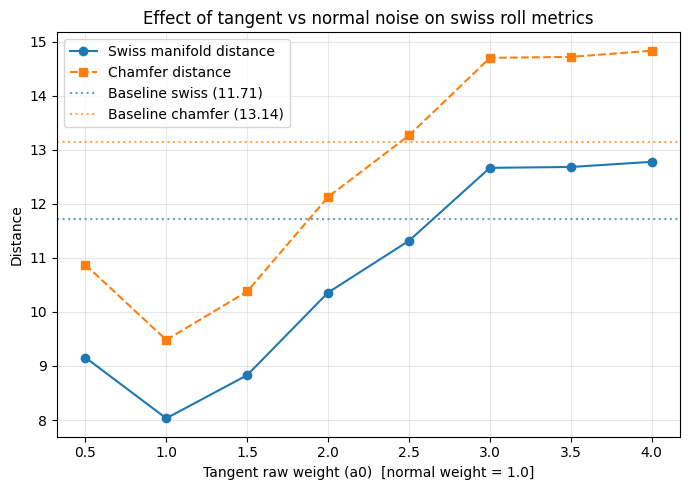

In [8]:
# Filter out the exploding 0.0 ratio for the main plot
manifold_clean = manifold_df[manifold_df["ratio"] > 0].copy()

plt.figure(figsize=(7, 5))

# Swiss manifold distance
plt.plot(
    manifold_clean["ratio"],
    manifold_clean["swiss_dist"],
    "o-",
    label="Swiss manifold distance",
)

# Chamfer distance
plt.plot(
    manifold_clean["ratio"],
    manifold_clean["chamfer"],
    "s--",
    label="Chamfer distance",
)

# Baseline as horizontal lines
plt.axhline(
    baseline["swiss_dist"],
    color="C0",
    linestyle=":",
    alpha=0.7,
    label=f"Baseline swiss ({baseline['swiss_dist']:.2f})",
)
plt.axhline(
    baseline["chamfer"],
    color="C1",
    linestyle=":",
    alpha=0.7,
    label=f"Baseline chamfer ({baseline['chamfer']:.2f})",
)

plt.xlabel("Tangent raw weight (a0)  [normal weight = 1.0]")
plt.ylabel("Distance")
plt.title("Effect of tangent vs normal noise on swiss roll metrics")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


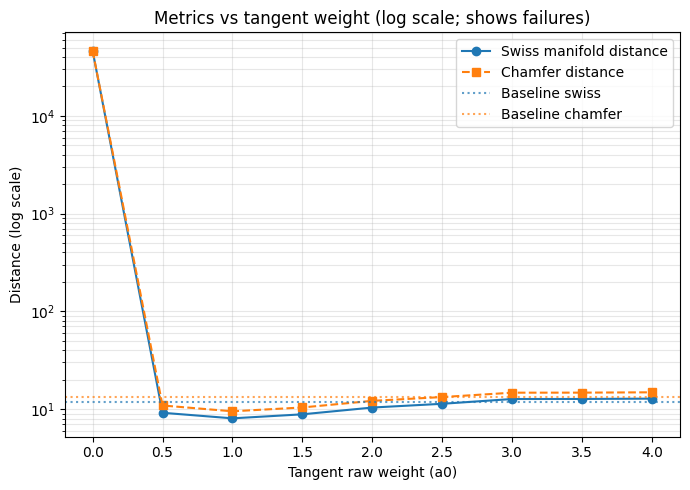

In [9]:
plt.figure(figsize=(7, 5))

plt.plot(
    manifold_df["ratio"],
    manifold_df["swiss_dist"],
    "o-",
    label="Swiss manifold distance",
)
plt.plot(
    manifold_df["ratio"],
    manifold_df["chamfer"],
    "s--",
    label="Chamfer distance",
)

# Baseline as horizontal lines
plt.axhline(
    baseline["swiss_dist"],
    color="C0",
    linestyle=":",
    alpha=0.7,
    label="Baseline swiss",
)
plt.axhline(
    baseline["chamfer"],
    color="C1",
    linestyle=":",
    alpha=0.7,
    label="Baseline chamfer",
)

plt.yscale("log")
plt.xlabel("Tangent raw weight (a0)")
plt.ylabel("Distance (log scale)")
plt.title("Metrics vs tangent weight (log scale; shows failures)")
plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.show()


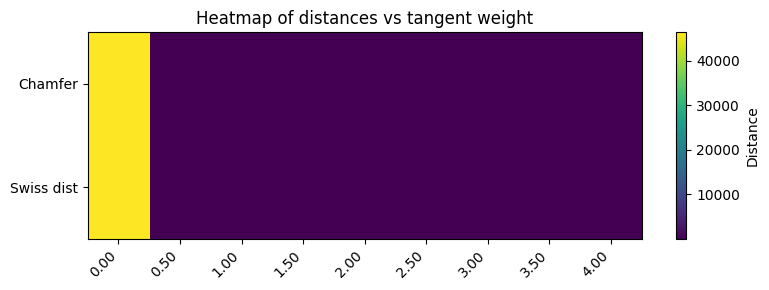

In [10]:
# Build a 2 x N matrix: rows = metrics, cols = ratios
metrics_mat = manifold_df[["ratio", "chamfer", "swiss_dist"]].set_index("ratio")
metrics_mat = metrics_mat.sort_index()  # ensure ratios in order

values = metrics_mat.T.values  # shape (2, N)
ratios_sorted = metrics_mat.index.values

plt.figure(figsize=(8, 3))
im = plt.imshow(values, aspect="auto")

plt.yticks([0, 1], ["Chamfer", "Swiss dist"])
plt.xticks(
    ticks=np.arange(len(ratios_sorted)),
    labels=[f"{r:.2f}" for r in ratios_sorted],
    rotation=45,
    ha="right",
)

plt.colorbar(im, label="Distance")
plt.title("Heatmap of distances vs tangent weight")
plt.tight_layout()
plt.show()


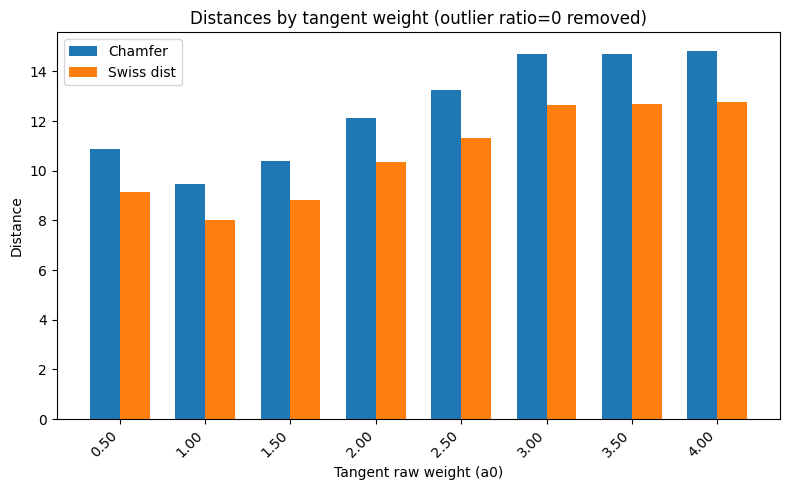

In [11]:
plt.figure(figsize=(8, 5))

width = 0.35
x = np.arange(len(manifold_clean))

plt.bar(
    x - width/2,
    manifold_clean["chamfer"],
    width,
    label="Chamfer",
)
plt.bar(
    x + width/2,
    manifold_clean["swiss_dist"],
    width,
    label="Swiss dist",
)

plt.xticks(
    x,
    [f"{r:.2f}" for r in manifold_clean["ratio"]],
    rotation=45,
    ha="right",
)
plt.ylabel("Distance")
plt.xlabel("Tangent raw weight (a0)")
plt.title("Distances by tangent weight (outlier ratio=0 removed)")
plt.legend()
plt.tight_layout()
plt.show()


Column 0: tangent=0.0
Column 1: tangent=0.5
Column 2: tangent=1.0
Column 3: tangent=1.5
Column 4: tangent=2.0
Column 5: tangent=2.5
Column 6: tangent=3.0
Column 7: tangent=3.5
Column 8: tangent=4.0


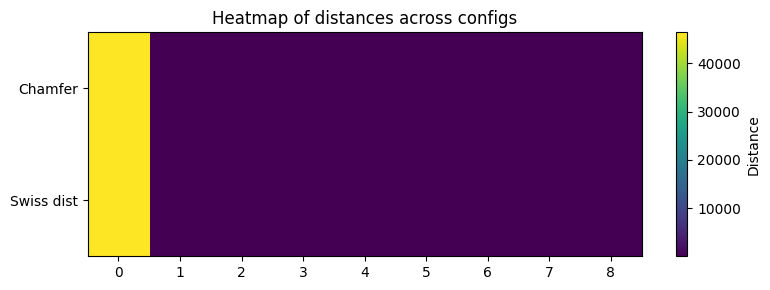

In [14]:
metrics_mat = manifold_df[["ratio", "chamfer", "swiss_dist"]] \
    .set_index("ratio") \
    .sort_index()

values = metrics_mat.T.values
ratios_sorted = metrics_mat.index.values

plt.figure(figsize=(8, 3))
im = plt.imshow(values, aspect="auto")

plt.yticks([0, 1], ["Chamfer", "Swiss dist"])
plt.xticks(
    ticks=np.arange(len(ratios_sorted)),
    labels=[str(i) for i in range(len(ratios_sorted))],  # index number
    rotation=0
)
for i, r in enumerate(ratios_sorted):
    print(f"Column {i}: tangent={r}")

plt.colorbar(im, label="Distance")
plt.title("Heatmap of distances across configs")
plt.tight_layout()
plt.show()


In [ ]:
# NEXT STEPS! 
# need to test on a bunch of differnet swiss rolls. 
# - Try adding noise to swiss roll. Try Torus maybe?, Try generating swiss rolls in higher dims. 
